In [1]:
import scipy as sp
import numpy as np
#import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#so, we have to completely rewrite the code, and basically do what he told us to do at the beginning, DISCRETIZE!!!

def FHNneuron(I,timespan,dt,point):
    #parameters
    #would be nice to explain what each param means
    a=0.7
    b=0.8
    c=3
    
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08*3 #1/tau
    t=np.arange(0.0, timespan, dt)
    
    #lets add noise with some modulation by a constant 0<k<1;
    k1=0.1
    k2=0.1
    
    noise1=k1*np.random.normal(0,1,len(t))
    noise2=k2*np.random.normal(0,1,len(t))
    
    v=np.zeros(len(t))
    w=np.zeros(len(t))
    
    v[0]=point[0]
    w[0]=point[1]
    
    for i in range (len(t)-1):
        v[i+1]=v[i]+dt*(v[i]-(v[i]**3)/3 + w[i] - R*I  + noise1[i])
        w[i+1]=w[i]+dt*(-(tauinv/c)*(v[i] - a + b*w[i]) + (tauinv)*noise2[i])
    
    return v,w

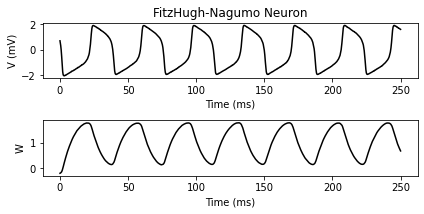

In [15]:
I=1;
tstop=250;
dt=0.01;
t=np.arange(0.0, tstop, dt)
neuron1=FHNneuron(I,tstop,dt,[0.7,-0.2]);
v=neuron1[0];
w=neuron1[1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('W')

#plt.subplot(3,1,3)
#plt.plot(v, w, 'k')
#plt.ylabel('phase plot')
plt.tight_layout()

plt.show()    

    
    
    
    

Text(0, 0.5, 'W')

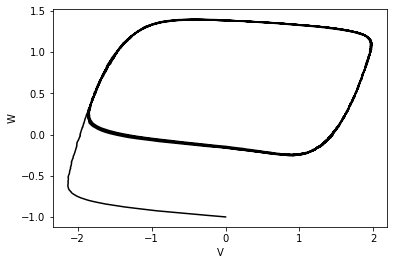

In [3]:
I=0.5;
tstop=250;
dt=0.01;
t=np.arange(0.0, tstop, dt)
neuron1=FHNneuron(I,tstop,dt,[0,-1]);
v=neuron1[0];
w=neuron1[1];

plt.figure()
#plt.title('FitzHugh-Nagumo Neuron')
plt.plot(v, w, 'k')
plt.xlabel('V')
plt.ylabel('W')


Text(0, 0.5, 'W')

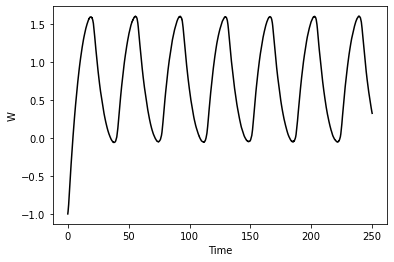

In [4]:
I=0.75;
tstop=250;
dt=0.01;
t=np.arange(0.0, tstop, dt)
neuron1=FHNneuron(I,tstop,dt,[0,-1]);
v=neuron1[0];
w=neuron1[1];

plt.figure()
#plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, w, 'k')
plt.xlabel('Time')
plt.ylabel('W')

(-1.0, 1.0)

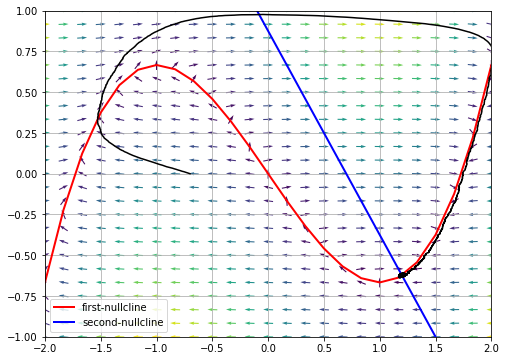

In [5]:
def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - (v**3)/3 + w - R*Iext
    dwdt = -(tauinv/c)*(v - a + b*w)
        
    return dvdt, dwdt
a=0.7;
b=0.8;
c=3;
    
#these two params from scholarpedia, would like better justification
R=1;
tauinv=0.08*3; #1/tau


#for this, pick Iext
Iext=0;

fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2,2,25);
w=np.linspace(-1,1,25);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return -(v - a)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

neuron=FHNneuron(Iext,tstop,dt,[-0.7,0]);
va=neuron[0];
wa=neuron[1];
ax4.plot(va,wa,'k-')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.quiver(V1, W1, DV1, DW1, M, pivot='mid')
ax4.legend()
ax4.grid()
plt.xlim(-2,2)
plt.ylim(-1,1)

Text(0, 0.5, 'W')

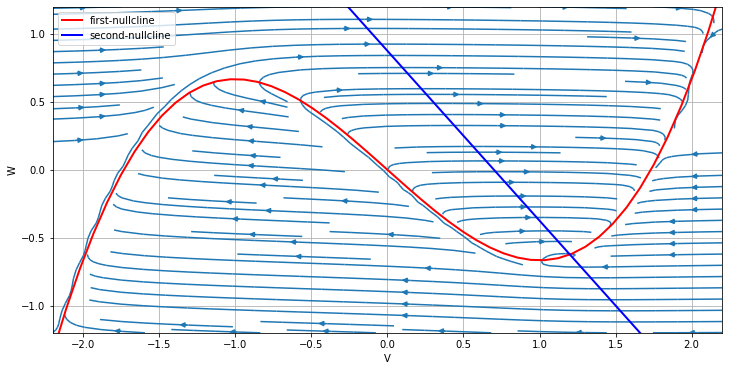

In [6]:
def Syst(X,Iext): #without time
    a=0.7
    b=0.8
    c=3
    #these two params from scholarpedia, would like better justification
    R=1
    tauinv=0.08 #1/tau
    """
    Integrate

    |  :param X:
    |  :param t:
    |  :return: calculate membrane potential & activation variables
    """
        
    v, w = X
        
    dvdt = v - (v**3)/3 + w - R*Iext
    dwdt = -(tauinv/c)*(v - a + b*w)
        
    return dvdt, dwdt
a=0.7;
b=0.8;
c=3;
    
#these two params from scholarpedia, would like better justification
R=1;
tauinv=0.08*3; #1/tau


#for this, pick Iext
Iext=0;

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1.2,1.2,50);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return (a - v)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

#should do a bunch of initial points...

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-2.2,2.2)
plt.ylim(-1.2,1.2)
plt.xlabel('V')
plt.ylabel('W')


(-1.2, 1.2)

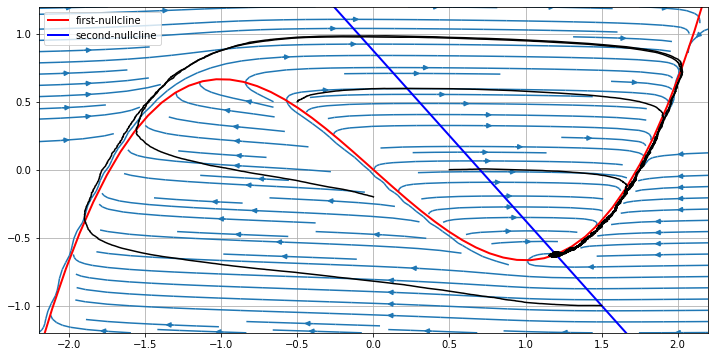

In [7]:
#for this, pick Iext
Iext=0;

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1.2,1.2,50);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return (a - v)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

#should do a bunch of initial points...

points=[[0,-0.2],[-0.5,0.5],[0.5,0],[1.5,-1]]

for point in points:
    neuron=FHNneuron(Iext,tstop,dt,point);
    va=neuron[0];
    wa=neuron[1];
    ax4.plot(va,wa,'k-')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-2.2,2.2)
plt.ylim(-1.2,1.2)


(-1.5, 2.0)

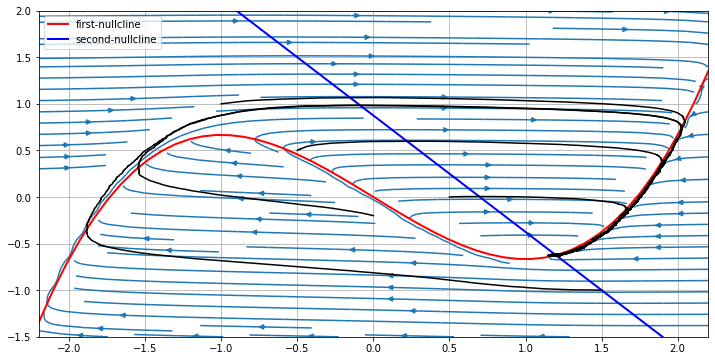

In [8]:
#for this, pick Iext
Iext=0;

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1.5,2,50);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return (a - v)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

#should do a bunch of initial points...

points=[[0,-0.2],[-0.5,0.5],[0.5,0],[1.5,-1],[-1,1]]

for point in points:
    neuron=FHNneuron(Iext,tstop,dt,point);
    va=neuron[0];
    wa=neuron[1];
    ax4.plot(va,wa,'k-')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-2.2,2.2)
plt.ylim(-1.5,2)


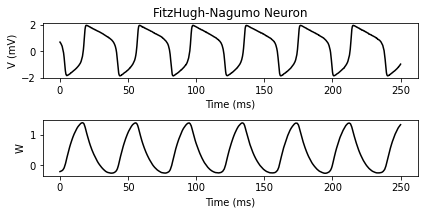

In [9]:
I=0.5;
tstop=250;
dt=0.01;
t=np.arange(0.0, tstop, dt)
neuron1=FHNneuron(I,tstop,dt,[0.7,-0.2]);
v=neuron1[0];
w=neuron1[1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('W')

#plt.subplot(3,1,3)
#plt.plot(v, w, 'k')
#plt.ylabel('phase plot')
plt.tight_layout()

plt.show()    


(-1.5, 2.0)

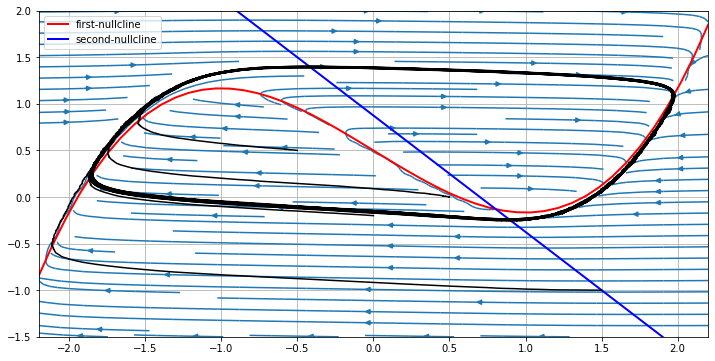

In [10]:
#for this, pick Iext
Iext=0.5;

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1.5,2,50);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return (a - v)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

#should do a bunch of initial points...

points=[[0,-0.2],[-0.5,0.5],[0.5,0],[1.5,-1]]

for point in points:
    neuron=FHNneuron(Iext,tstop,dt,point);
    va=neuron[0];
    wa=neuron[1];
    ax4.plot(va,wa,'k-')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-2.2,2.2)
plt.ylim(-1.5,2)


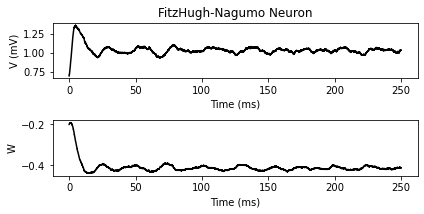

In [11]:
I=0.25;
tstop=250;
dt=0.01;
t=np.arange(0.0, tstop, dt)
neuron1=FHNneuron(I,tstop,dt,[0.7,-0.2]);
v=neuron1[0];
w=neuron1[1];

plt.figure()

plt.subplot(3,1,1)
plt.title('FitzHugh-Nagumo Neuron')
plt.plot(t, v, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')

plt.subplot(3,1,2)
plt.plot(t, w, 'k')
plt.xlabel('Time (ms)')
plt.ylabel('W')

#plt.subplot(3,1,3)
#plt.plot(v, w, 'k')
#plt.ylabel('phase plot')
plt.tight_layout()

plt.show()    


(-1.5, 2.0)

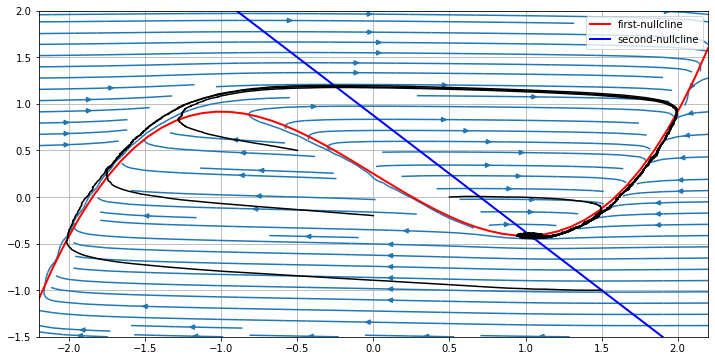

In [12]:
#for this, pick Iext
Iext=0.25;

fig2 = plt.figure(figsize=(12,6))
ax4 = fig2.add_subplot(1,1,1)

v=np.linspace(-2.2,2.2,50);
w=np.linspace(-1.5,2,50);

def w1(v,Iext):
    return (-v + (v**3)/3 + Iext)

def w2(v,Iext):
    return (a - v)/b

ax4.plot(v,w1(v,Iext),'r-', lw=2, label='first-nullcline')
ax4.plot(v,w2(v,Iext),'b-', lw=2, label='second-nullcline')

#ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline') fill these in with the actual nullclines, found by hand???
#ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

#should do a bunch of initial points...

points=[[0,-0.2],[-0.5,0.5],[0.5,0],[1.5,-1]]

for point in points:
    neuron=FHNneuron(Iext,tstop,dt,point);
    va=neuron[0];
    wa=neuron[1];
    ax4.plot(va,wa,'k-')

V1, W1 = np.meshgrid(v, w)
DV1, DW1 = Syst([V1, W1],Iext)
M = (np.hypot(DV1, DW1))
M[ M == 0] = 1.
DV1 /= M
DW1 /= M

ax4.streamplot(V1, W1, DV1, DW1)
ax4.legend()
ax4.grid()
plt.xlim(-2.2,2.2)
plt.ylim(-1.5,2)
